In [13]:
import pandas as pd

In [24]:
df = pd.read_csv('2017_jun_final.csv')

df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


In [22]:
df = df.dropna(axis=1)
df.isnull().sum()

N                                   0
Должность                           0
Общий.опыт.работы                   0
Опыт.работы.на.текущем.месте        0
Зарплата.в.месяц                    0
Изменение.зарплаты.за.12.месяцев    0
Город                               0
Размер.компании                     0
Тип.компании                        0
Пол                                 0
Возраст                             0
Образование                         0
Еще.студент                         0
Уровень.английского                 0
Дата.заполнения                     0
User.Agent                          0
exp                                 0
current_job_exp                     0
salary                              0
dtype: int64

In [25]:
df1 = pd.concat([df.dropna(axis=1), df["Язык.программирования"]], axis=1)

In [26]:
python_data = df1[df1["Язык.программирования"] == "Python"]

In [27]:
python_data = python_data.groupby(['Должность'])

In [28]:
new_df = python_data.agg({"Зарплата.в.месяц" : ["max", "min"]})

In [29]:
import numpy as np


def fill_avg_salary(salary):
    return np.mean(salary)


df[["Зарплата.в.месяц"]].apply(fill_avg_salary)


Зарплата.в.месяц    1666.704159
dtype: float64

In [30]:
df["avg"] = df["Зарплата.в.месяц"].apply(fill_avg_salary)

Перша частин
    Для кожної з домашніх робіт попереднього модуля додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.

In [31]:
%matplotlib inline

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of salaries by language')

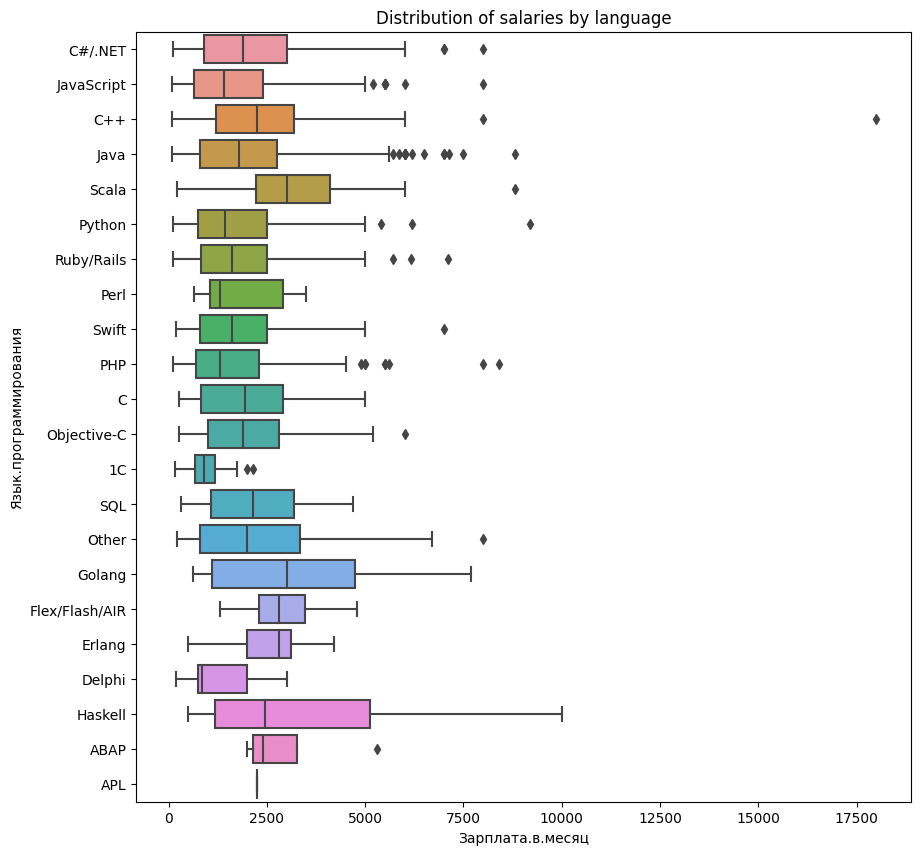

In [61]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, 
            x="Зарплата.в.месяц", 
            y="Язык.программирования").set_title("Distribution of salaries by language")

Text(0.5, 1.0, 'Change in salary for 12 months')

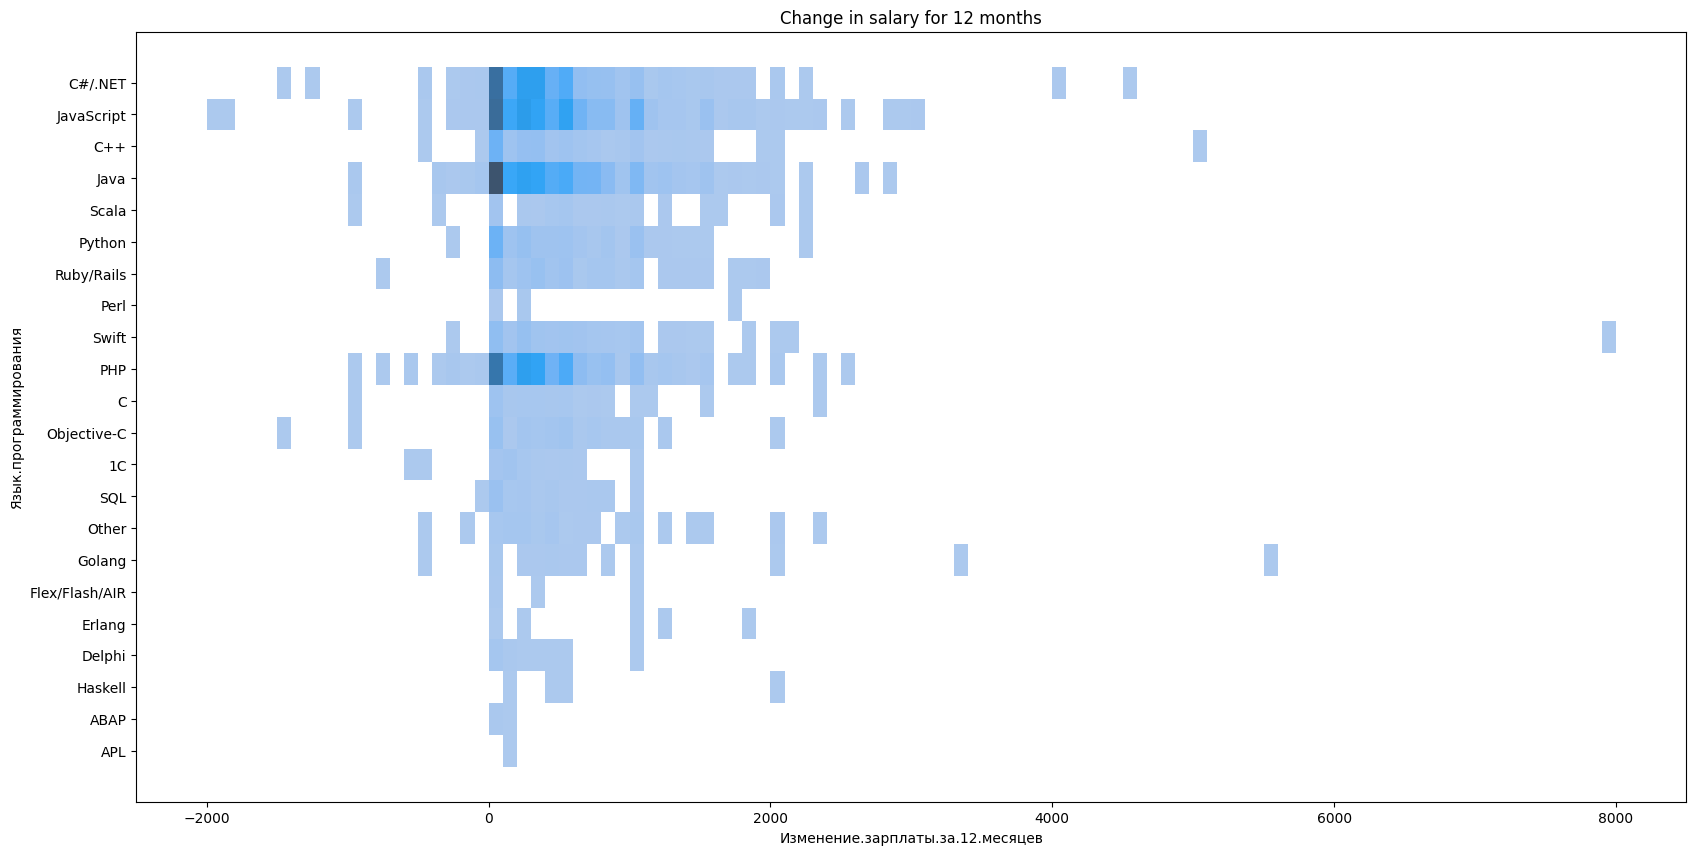

In [55]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, 
            x="Изменение.зарплаты.за.12.месяцев", 
            y="Язык.программирования",
            bins=100).set_title("Change in salary for 12 months")

Text(0.5, 1.0, 'Distribution of salaries by language')

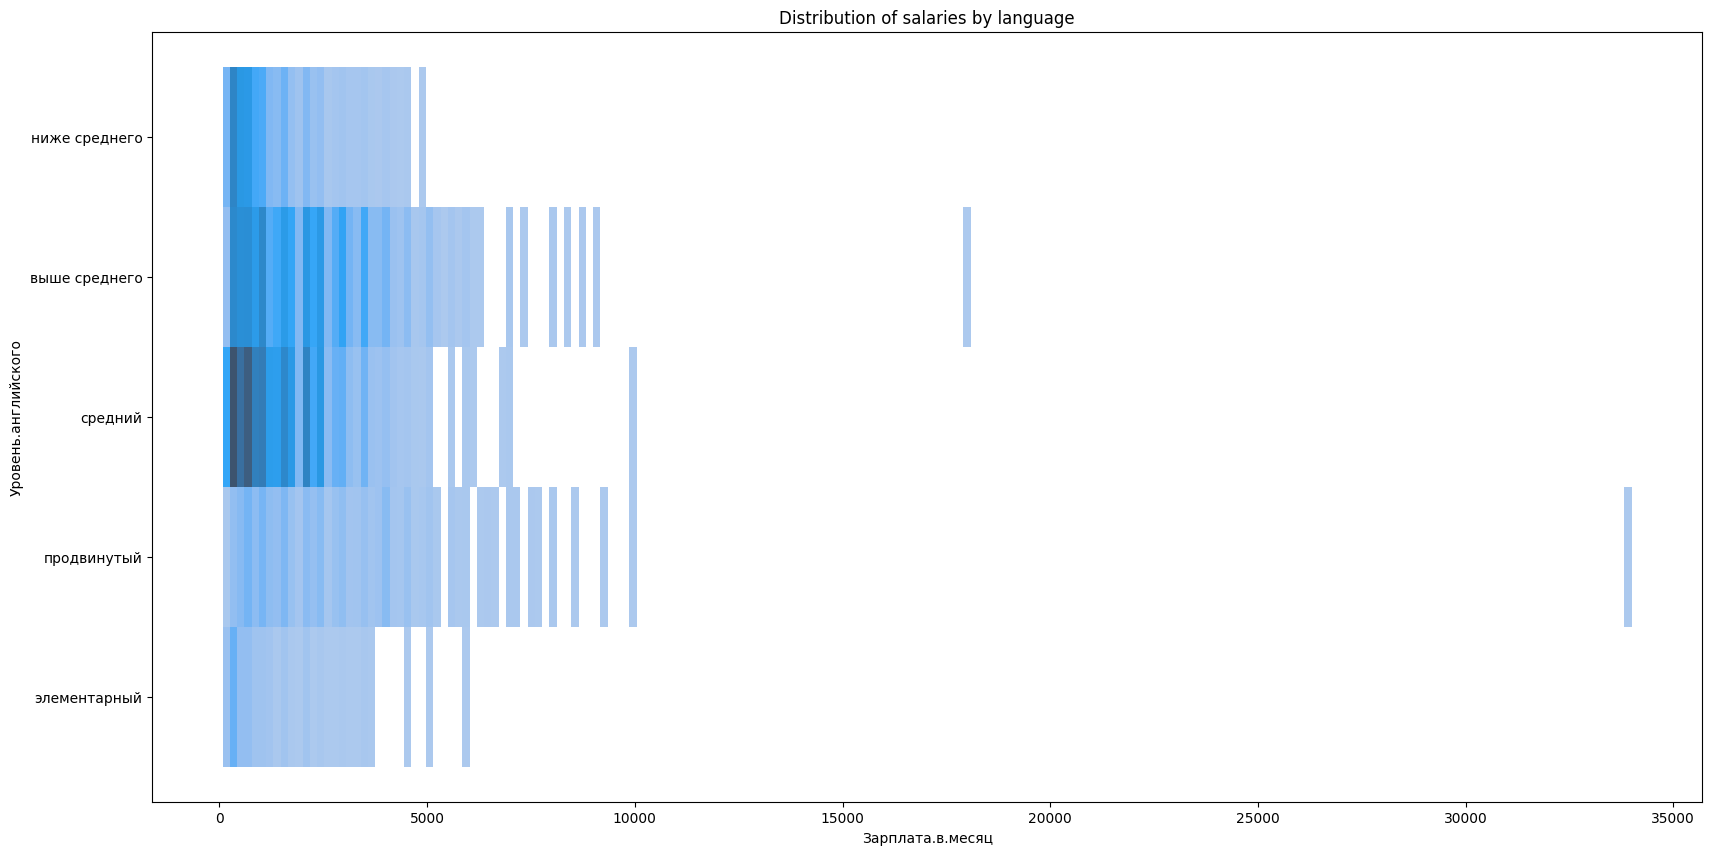

In [65]:
plt.figure(figsize=(20,10))
sns.histplot(x="Зарплата.в.месяц", y="Уровень.английского", data=df).set_title("Distribution of salaries by language")